In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Data Calling

In [164]:
df = pd.read_csv("insurance.csv")
df = df[["age", "sex", "bmi", "children", "smoker", "charges", "region"]]
df.head()

,age,sex,bmi,children,smoker,charges,region
0,19,female,27.900,0,yes,16884.92400,southwest
1,18,male,33.770,1,no,1725.55230,southeast
2,28,male,33.000,3,no,4449.46200,southeast
3,33,male,22.705,0,no,21984.47061,northwest
4,32,male,28.880,0,no,3866.85520,northwest


In [139]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 2. Data cleaning, Visualization, and Pre-processing

In [140]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
region      0
dtype: int64

## 2.1. Label Encoding & One Hot Encoding

In [165]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dfle = df
le.fit(dfle.sex.drop_duplicates()) 
dfle.sex = le.transform(dfle.sex)

le.fit(dfle.smoker.drop_duplicates()) 
dfle.smoker = le.transform(dfle.smoker)

dfle.region = le.fit_transform(dfle.region)

dfle = dfle.rename(columns = {"age" : "Age", "sex" : "Sex", "bmi": "BMI", "children" : "Children", "smoker": "Smoker", 
                          "region": "Region", "charges": "Charges"})

dfle.head()

,Age,Sex,BMI,Children,Smoker,Charges,Region
0,19,0,27.900,0,1,16884.92400,3
1,18,1,33.770,1,0,1725.55230,2
2,28,1,33.000,3,0,4449.46200,2
3,33,1,22.705,0,0,21984.47061,1
4,32,1,28.880,0,0,3866.85520,1


In [166]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
reg = dfle[["Region"]].values
reg = ohe.fit_transform(reg).toarray()
reg

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [167]:
dfohe = pd.DataFrame(reg)
dfohe["Northeast"] = dfohe[0].apply(lambda x: int(x))
dfohe["Northwest"] = dfohe[1].apply(lambda x: int(x))
dfohe["Southeast"] = dfohe[2].apply(lambda x: int(x))
dfohe.head()

,0,1,2,3,Northeast,Northwest,Southeast
0,0.0,0.0,0.0,1.0,0,0,0
1,0.0,0.0,1.0,0.0,0,0,1
2,0.0,0.0,1.0,0.0,0,0,1
3,0.0,1.0,0.0,0.0,0,1,0
4,0.0,1.0,0.0,0.0,0,1,0


In [168]:
dfohe = dfohe[["Northeast", "Northwest", "Southeast"]]
dfohe.head()

,Northeast,Northwest,Southeast
0,0,0,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [169]:
dfult = pd.concat([dfle, dfohe], axis=1, sort=False)
dfult = dfult[["Age", "Sex", "BMI", "Children", "Smoker", "Northeast", "Northwest", "Southeast", "Charges"]]
dfult.head()

,Age,Sex,BMI,Children,Smoker,Northeast,Northwest,Southeast,Charges
0,19,0,27.900,0,1,0,0,0,16884.92400
1,18,1,33.770,1,0,0,0,1,1725.55230
2,28,1,33.000,3,0,0,0,1,4449.46200
3,33,1,22.705,0,0,0,1,0,21984.47061
4,32,1,28.880,0,0,0,1,0,3866.85520


In [149]:
dfult.corr().Charges.sort_values()

Northwest   -0.039905
Northeast    0.006349
Sex          0.057292
Children     0.067998
Southeast    0.073982
BMI          0.198341
Age          0.299008
Smoker       0.787251
Charges      1.000000
Name: Charges, dtype: float64

In [150]:
dfult.describe()

,Age,Sex,BMI,Children,Smoker,Northeast,Northwest,Southeast,Charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,0.242152,0.242900,0.272048,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,0.428546,0.428995,0.445181,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,0.000000,0.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,0.000000,0.000000,1.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000,63770.428010


## 2.2. Visualization

### 2.2.1. Correlation Heat Map

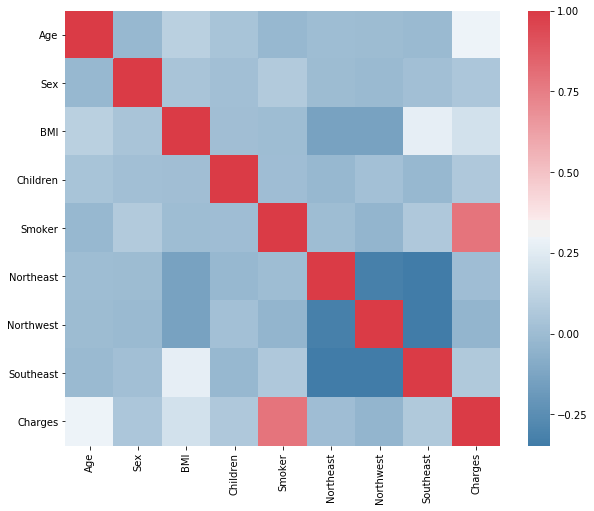

In [269]:
f, ax = pl.subplots(figsize = (10, 8))
corr = dfult.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(240, 10, as_cmap = True),
            square = True, ax = ax)

### 2.2.2. Charges Distribution for Smokers and Non-smokers

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

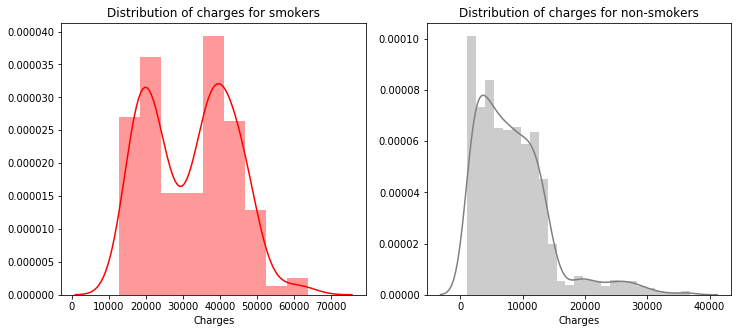

In [70]:
f= pl.figure(figsize=(12,5))

ax = f.add_subplot(121)
sns.distplot(dfult[(dfult.Smoker == 1)]["Charges"], color = "r", ax = ax)
ax.set_title("Distribution of charges for smokers")

ax = f.add_subplot(122)
sns.distplot(dfult[(dfult.Smoker == 0)]["Charges"], color = "gray" ,ax = ax)
ax.set_title("Distribution of charges for non-smokers")

#### 2.2.2.1. Charges Distribution for Smokers and Non-smokers by Gender

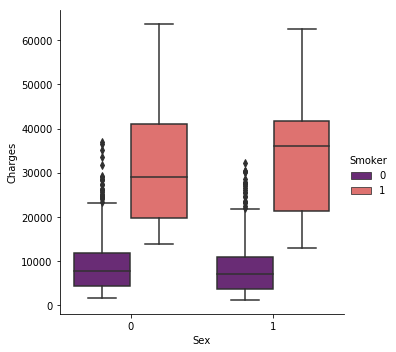

In [72]:
sns.catplot(x = "Sex", y = "Charges", hue = "Smoker",
            kind = "box", data = dfult, palette = "magma")

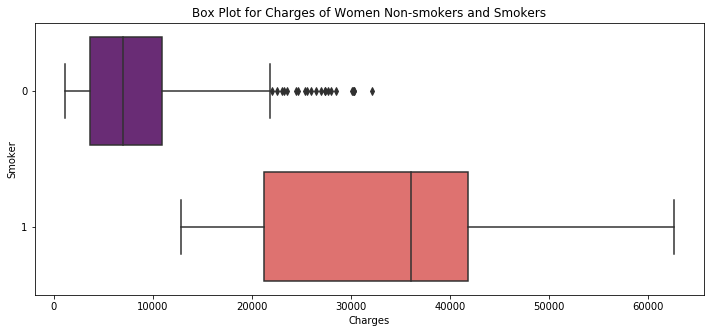

In [272]:
pl.figure(figsize=(12,5))
pl.title("Box Plot for Charges of Women Non-smokers and Smokers")
sns.boxplot(y = "Smoker", x = "Charges", data =  dfult[(dfult.Sex == 1)] , orient = "h", palette = "magma")

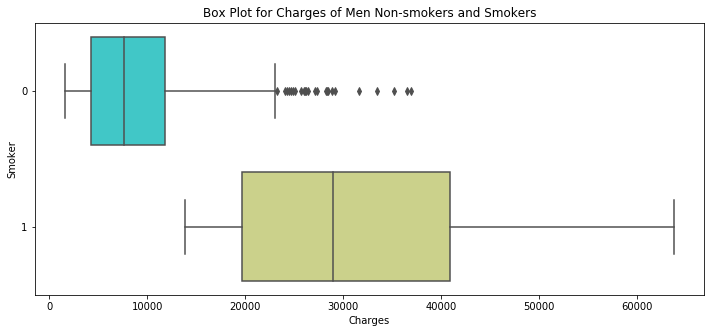

In [273]:
pl.figure(figsize=(12,5))
pl.title("Box Plot for Charges of Men Non-smokers and Smokers")
sns.boxplot(y = "Smoker", x = "Charges", data =  dfult[(dfult.Sex == 0)] , orient = "h", palette = "rainbow")

### 2.2.3. Charges Distribution by Age

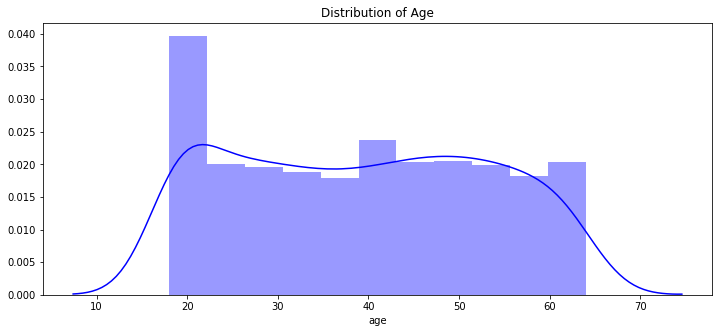

In [278]:
pl.figure(figsize=(12,5))
pl.title("Distribution of Age")
ax = sns.distplot(df["age"], color = "b")

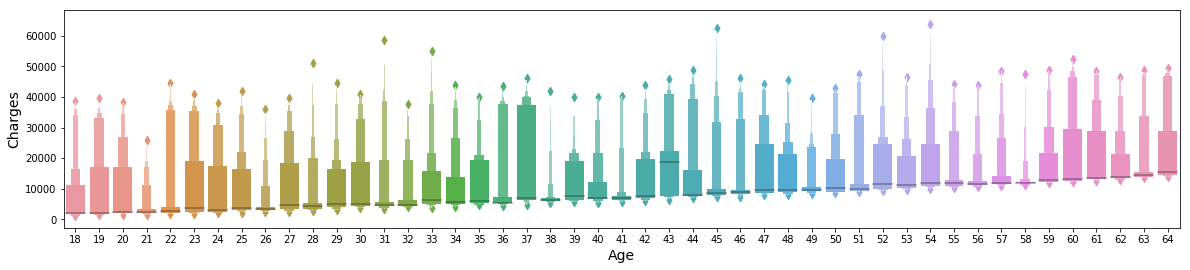

In [76]:
f, ax = pl.subplots(1, 1, figsize = (20, 4))
sns.boxenplot(x = "Age", y = "Charges", data = dfult, ax = ax)
ax.set_xlabel("Age", fontsize = 14)
ax.set_ylabel("Charges", fontsize = 14)
pl.show()

#### 2.2.3.1. Charges Distribution for Smokers and Non-smokers by Age

Text(0.5, 1.0, 'The number of smokers and non-smokers (20 years old)')

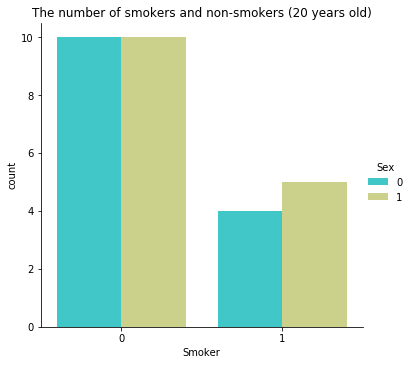

In [77]:
sns.catplot(x = "Smoker", kind = "count", hue = "Sex", palette = "rainbow", data = dfult[(dfult.Age == 20)])
pl.title("The number of smokers and non-smokers (20 years old)")

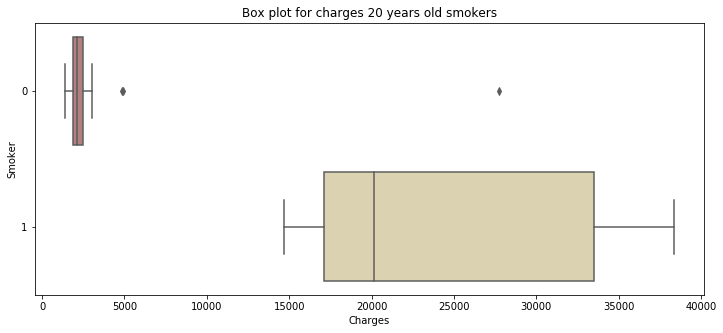

In [78]:
pl.figure(figsize = (12, 5))
pl.title("Box plot for charges 20 years old smokers")
sns.boxplot(y = "Smoker", x = "Charges", data = dfult[(dfult.Age == 20)] , orient = "h", palette = "pink")

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

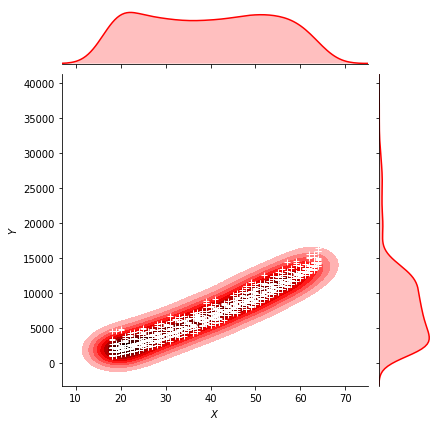

In [79]:
g = sns.jointplot(x = "Age", y = "Charges", data = dfult[(dfult.Smoker == 0)], kind = "kde", color = "r")
g.plot_joint(pl.scatter, c = "w", s = 30, linewidth = 1, marker = "+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title("Distribution of charges and age for non-smokers")

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

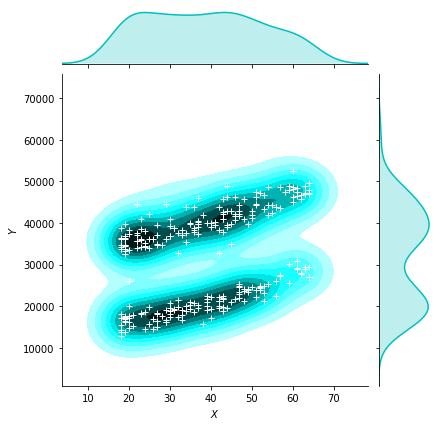

In [80]:
g = sns.jointplot(x = "Age", y ="Charges", data = dfult[(dfult.Smoker == 1)], kind = "kde", color = "c")
g.plot_joint(pl.scatter, c = "w", s = 30, linewidth = 1, marker = "+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

Text(0.5, 1.0, 'Non-smokers and smokers')

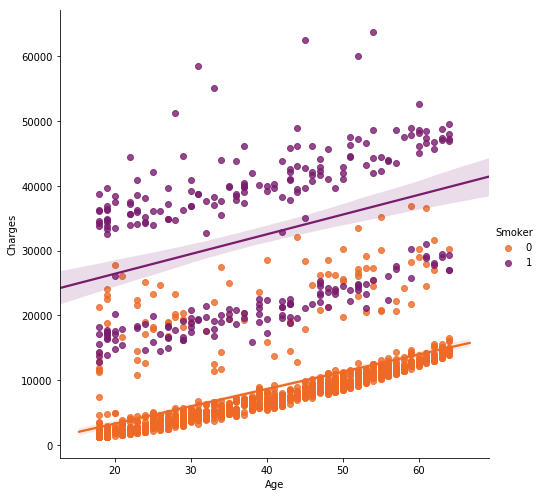

In [81]:
sns.lmplot(x = "Age", y = "Charges", hue = "Smoker", data = dfult, palette = "inferno_r", height = 7)
ax.set_title("Non-smokers and smokers")

### 2.2.4. Charges Distribution by BMI

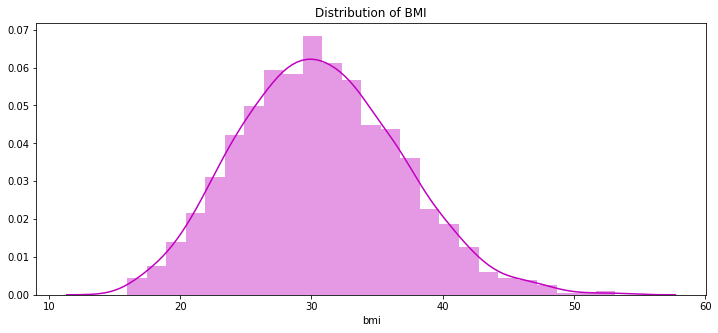

In [282]:
pl.figure(figsize=(12,5))
pl.title("Distribution of BMI")
ax = sns.distplot(df["bmi"], color = "m")

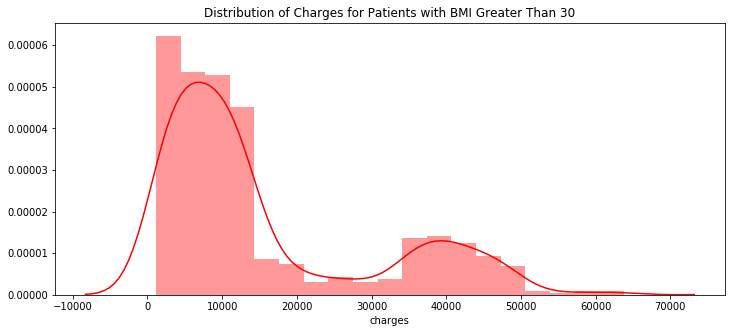

In [284]:
pl.figure(figsize = (12,5))
pl.title("Distribution of Charges for Patients with BMI Greater Than 30")
ax = sns.distplot(df[(df.bmi >= 30)]["charges"], color = "r")

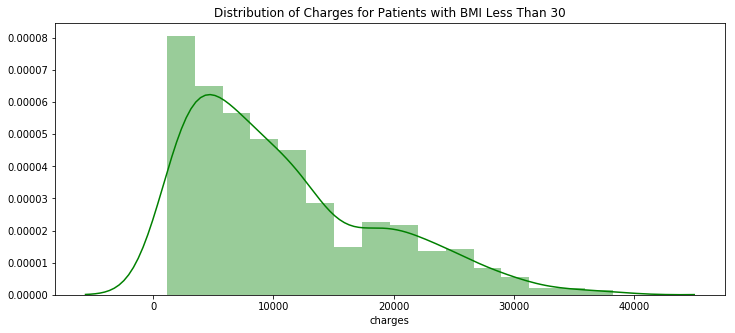

In [285]:
pl.figure(figsize = (12,5))
pl.title("Distribution of Charges for Patients with BMI Less Than 30")
ax = sns.distplot(df[(df.bmi < 30)]["charges"], color = "g")

Text(0.5, 1.0, 'Distribution of BMI and charges')

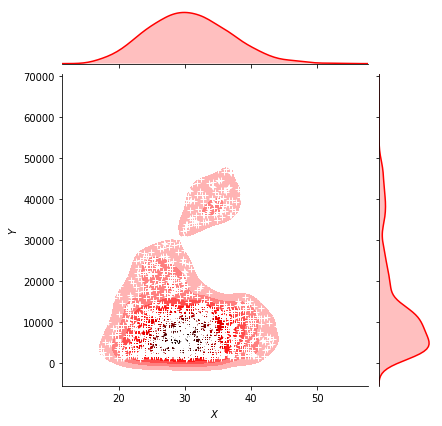

In [85]:
g = sns.jointplot(x = "BMI", y = "Charges", data = dfult, kind = "kde", color = "r")
g.plot_joint(pl.scatter, c = "w", s = 30, linewidth = 1, marker = "+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title("Distribution of BMI and charges")

#### 2.2.4.1. Charges Distribution for Smokers and Non-smokers by BMI

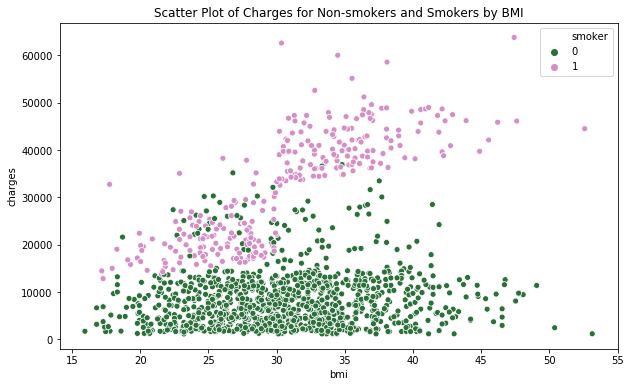

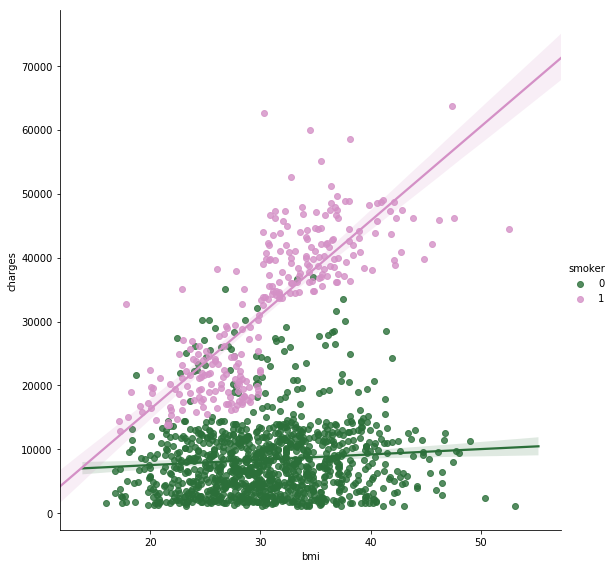

In [290]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x = "bmi", y = "charges", data = df, palette = "cubehelix", hue = "smoker")
ax.set_title("Scatter Plot of Charges for Non-smokers and Smokers by BMI")
sns.lmplot(x = "bmi", y = "charges", hue = "smoker", data = df, palette = "cubehelix", height = 8)

### 2.2.5. Charges Distribution by Number of Children

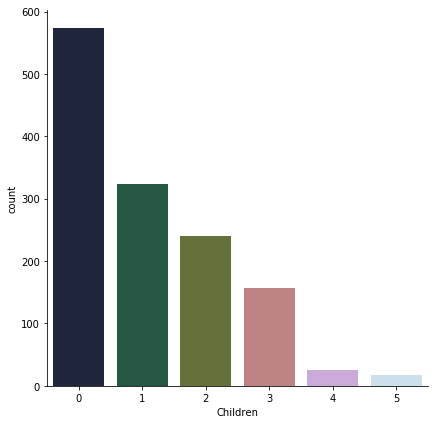

In [87]:
sns.catplot(x = "Children", kind = "count", palette = "cubehelix", data = dfult, height = 6)

#### 2.2.2.1 Charges Distribution for Smokers and Non-smokers by Number of Children

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

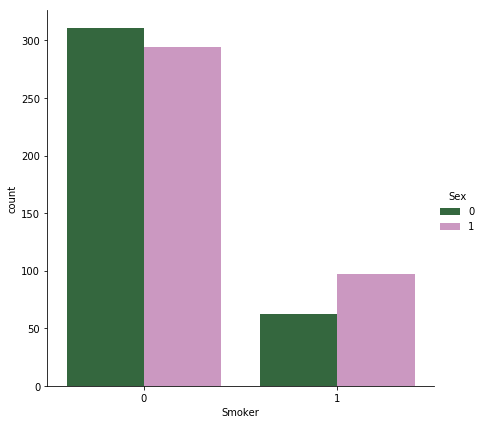

In [88]:
sns.catplot(x = "Smoker", kind = "count", palette = "cubehelix", hue = "Sex",
            data = dfult[(dfult.Children > 0)], height = 6)
ax.set_title("Smokers and non-smokers who have childrens")

# 3. Further Pre-processing

In [89]:
dfult.head()

,Age,Sex,BMI,Children,Smoker,Northeast,Northwest,Southeast,Charges
0,19,0,27.900,0,1,0,0,0,16884.92400
1,18,1,33.770,1,0,0,0,1,1725.55230
2,28,1,33.000,3,0,0,0,1,4449.46200
3,33,1,22.705,0,0,0,1,0,21984.47061
4,32,1,28.880,0,0,0,1,0,3866.85520


## 3.1 Standardization

In [170]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dffin = dfult

In [171]:
scaler.fit(dffin[["Age", "BMI"]])
z = scaler.transform(dffin[["Age", "BMI"]])
z

array([[-1.43876426, -0.45332   ],
       [-1.50996545,  0.5096211 ],
       [-0.79795355,  0.38330685],
       ...,
       [-1.50996545,  1.0148781 ],
       [-1.29636188, -0.79781341],
       [ 1.55168573, -0.26138796]])

In [172]:
zAge = z[:,0]
zBMI = z[:,1]
dffin["Age"] = zAge
dffin["BMI"] = zBMI
dffin.head()

,Age,Sex,BMI,Children,Smoker,Northeast,Northwest,Southeast,Charges
0,-1.438764,0,-0.453320,0,1,0,0,0,16884.92400
1,-1.509965,1,0.509621,1,0,0,0,1,1725.55230
2,-0.797954,1,0.383307,3,0,0,0,1,4449.46200
3,-0.441948,1,-1.305531,0,0,0,1,0,21984.47061
4,-0.513149,1,-0.292556,0,0,0,1,0,3866.85520


In [173]:
dffin.describe()

,Age,Sex,BMI,Children,Smoker,Northeast,Northwest,Southeast,Charges
count,1.338000e+03,1338.000000,1.338000e+03,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,-1.853691e-16,0.505232,-1.869041e-16,1.094918,0.204783,0.242152,0.242900,0.272048,13270.422265
std,1.000374e+00,0.500160,1.000374e+00,1.205493,0.403694,0.428546,0.428995,0.445181,12110.011237
min,-1.509965e+00,0.000000,-2.412011e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1121.873900
25%,-8.691547e-01,0.000000,-7.164063e-01,0.000000,0.000000,0.000000,0.000000,0.000000,4740.287150
50%,-1.474046e-02,1.000000,-4.320880e-02,1.000000,0.000000,0.000000,0.000000,0.000000,9382.033000
75%,8.396738e-01,1.000000,6.611572e-01,2.000000,0.000000,0.000000,0.000000,1.000000,16639.912515
max,1.765289e+00,1.000000,3.685522e+00,5.000000,1.000000,1.000000,1.000000,1.000000,63770.428010


# 4. Modelling

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import cross_val_score

## 4.1. Linear Regression

In [175]:
x = dffin[["Age" ,"Sex", "BMI", "Children", "Smoker", "Northeast", "Northwest", "Southeast"]]
y = dffin.Charges

xtr, xts, ytr, yts = train_test_split(x, y, random_state = 0, test_size = 0.2)

linreg = LinearRegression()

linreg.fit(xtr, ytr)

ytr_pred = linreg.predict(xtr)
yts_pred = linreg.predict(xts)

linreg.score(xts, yts)

0.7999876970680433

## 4.2. Polynomial Regression

In [176]:
X = dffin[["Age" ,"Sex", "BMI", "Children", "Smoker", "Northeast", "Northwest", "Southeast"]]
Y = dffin.Charges

quad = PolynomialFeatures (degree = 2)
X_quad = quad.fit_transform(X)

Xtr, Xts, Ytr, Yts = train_test_split(X_quad, Y, random_state = 0, test_size = 0.2)

polreg = LinearRegression()

polreg.fit(Xtr, Ytr)

Ytr_pred = polreg.predict(Xtr)
Yts_pred = polreg.predict(Xts)

polreg.score(Xts, Yts)

0.8802620539610426

## 4.3. Random Forest

In [177]:
xx = dffin[["Age" ,"Sex", "BMI", "Children", "Smoker", "Northeast", "Northwest", "Southeast"]]
yy = dffin.Charges

xxtr, xxts, yytr, yyts = train_test_split(xx, yy, random_state = 0, test_size = 0.2)

ranfor = RandomForestRegressor(n_estimators = 100, max_depth = 2)

ranfor.fit(xxtr, yytr)

yytr_pred = ranfor.predict(xxtr)
yyts_pred = ranfor.predict(xxts)

ranfor.score(xxts, yyts)

0.8659588909363041

### 4.3.1. Hyperparameter Tuning Random Forest (Grid Search)

In [105]:
param1 =  {"n_estimators": [1200],
           "max_features": ["auto"],
           "max_depth": [50],
           "min_samples_split": [7,10,13],
           "min_samples_leaf": [4,7,10],
           "bootstrap": [True],
           "criterion": ["mse"],
           "random_state" : [42] }
ranfor.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [106]:
from sklearn.model_selection import GridSearchCV

ranforgs = GridSearchCV(estimator = ranfor, param_grid = param1, cv = 10)
ranforgs.fit(xxtr, yytr)
ranforgs.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 7,
 'n_estimators': 1200,
 'random_state': 42}

In [178]:
param_best = { 'bootstrap': True,
               'criterion': 'mse',
               'max_depth': 50,
               'max_features': 'auto',
               'min_samples_leaf': 10,
               'min_samples_split': 7,
               'n_estimators': 1200,
               'random_state': 42 }

ranforht = RandomForestRegressor(bootstrap = True, criterion = "mse", max_depth = 50, max_features = "auto",
                                 min_samples_leaf = 10, min_samples_split = 7, n_estimators = 1200, random_state = 42)

ranforht.fit(xxtr, yytr)

yytr_pred = ranforht.predict(xxtr)
yyts_pred = ranforht.predict(xxts)

ranforht.score(xxts, yyts)

0.9010916253271046

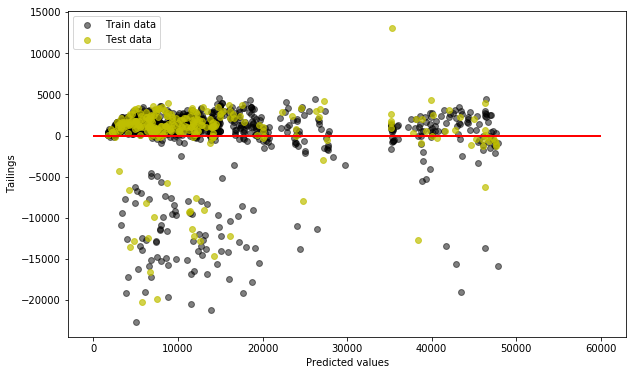

In [293]:
pl.figure(figsize=(10,6))

pl.scatter(yytr_pred, yytr_pred - yytr,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(yyts_pred, yyts_pred - yyts,
          c = 'y', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()

# 5. Scoring & Evaluation

In [179]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    rmse = np.sqrt(mean_squared_error(test_labels, predictions))
    r2 = r2_score(test_labels, predictions)
    print('Model Performance')
    print('RMSE = {:0.2f}'.format(rmse))
    print('R2 Score = {:0.2f}.'.format(r2))
    
    return

print("Evaluasi Linear Regression\n------------------------------------------------------------\n") 
print(evaluate(linreg, xts, yts), "\n\n")
print("Evaluasi Polinomial Regression\n------------------------------------------------------------\n") 
print(evaluate(polreg, Xts, Yts), "\n\n")
print("Evaluasi Random Forest Regression\n------------------------------------------------------------\n") 
print(evaluate(ranfor, xxts, yyts), "\n\n")
print("Evaluasi Random Forest Regression Hyperparameter Tuning\n------------------------------------------------------------\n") 
print(evaluate(ranforht, xxts, yyts), "\n\n")

Evaluasi Linear Regression
------------------------------------------------------------

Model Performance
RMSE = 5641.63
R2 Score = 0.80.
None 


Evaluasi Polinomial Regression
------------------------------------------------------------

Model Performance
RMSE = 4365.08
R2 Score = 0.88.
None 


Evaluasi Random Forest Regression
------------------------------------------------------------

Model Performance
RMSE = 4618.44
R2 Score = 0.87.
None 


Evaluasi Random Forest Regression Hyperparameter Tuning
------------------------------------------------------------

Model Performance
RMSE = 3967.28
R2 Score = 0.90.
None 




### >>> Dipilih model menggunakan random forest karena menghasilkan nilai terbaik <<<

### --===---===---===---===---===---===---===---===---===---===---===---===---===--

### --===---===---===---===---===---===---===---===---===---===---===---===---===--

# 6. Example (Further Testing the Model)

In [180]:
df.head()

,age,sex,bmi,children,smoker,charges,region
0,19,0,27.900,0,1,16884.92400,3
1,18,1,33.770,1,0,1725.55230,2
2,28,1,33.000,3,0,4449.46200,2
3,33,1,22.705,0,0,21984.47061,1
4,32,1,28.880,0,0,3866.85520,1


## 6.1. Example 1 (as Group)

In [195]:
potensial = [
                {"Name" : "Andra", "Age" : 24, "Sex" : "1", "BMI" : 22.0, "Children" : 0, "Smoker" : 1, "Region" : 0},
                {"Name" : "Budi", "Age" : 31, "Sex" : "1", "BMI" : 23.0, "Children" : 1, "Smoker" : 0, "Region" : 1},
                {"Name" : "Caca", "Age" : 43, "Sex" : "0", "BMI" : 24.0, "Children" : 2, "Smoker" : 0, "Region" : 2},
                {"Name" : "Devi", "Age" : 16, "Sex" : "0", "BMI" : 25.0, "Children" : 0, "Smoker" : 0, "Region" : 3},
                {"Name" : "Evan", "Age" : 25, "Sex" : "1", "BMI" : 26.2, "Children" : 0, "Smoker" : 1, "Region" : 0},
                {"Name" : "Fonna", "Age" : 21, "Sex" : "0", "BMI" : 27.0, "Children" : 5, "Smoker" : 0, "Region" : 1},
                {"Name" : "Gista", "Age" : 25, "Sex" : "0", "BMI" : 28.0, "Children" : 3, "Smoker" : 0, "Region" : 2},
                {"Name" : "Hadi", "Age" : 33, "Sex" : "1", "BMI" : 29.0, "Children" : 2, "Smoker" : 0, "Region" : 3},
                {"Name" : "Intan", "Age" : 41, "Sex" : "0", "BMI" : 30.0, "Children" : 4, "Smoker" : 1, "Region" : 0},
                {"Name" : "Joko", "Age" : 64, "Sex" : "1", "BMI" : 31.0, "Children" : 0, "Smoker" : 1, "Region" : 1}
]

scout = pd.DataFrame(potensial)
scout = scout[["Name", "Age", "Sex", "BMI", "Children", "Smoker", "Region"]]
scout

,Name,Age,Sex,BMI,Children,Smoker,Region
0,Andra,24,1,22.0,0,1,0
1,Budi,31,1,23.0,1,0,1
2,Caca,43,0,24.0,2,0,2
3,Devi,16,0,25.0,0,0,3
4,Evan,25,1,26.2,0,1,0
5,Fonna,21,0,27.0,5,0,1
6,Gista,25,0,28.0,3,0,2
7,Hadi,33,1,29.0,2,0,3
8,Intan,41,0,30.0,4,1,0
9,Joko,64,1,31.0,0,1,1


In [196]:
ohe = OneHotEncoder()
reg = scout[["Region"]].values
reg = ohe.fit_transform(reg).toarray()
scohe = pd.DataFrame(reg)
scohe["Northeast"] = scohe[0].apply(lambda x: int(x))
scohe["Northwest"] = scohe[1].apply(lambda x: int(x))
scohe["Southeast"] = scohe[2].apply(lambda x: int(x))
scohe = scohe[["Northeast", "Northwest", "Southeast"]]
scult = pd.concat([scout, scohe], axis=1, sort=False)
scult = scult[["Name", "Age", "Sex", "BMI", "Children", "Smoker", "Northeast", "Northwest", "Southeast"]]
scult.head()

,Name,Age,Sex,BMI,Children,Smoker,Northeast,Northwest,Southeast
0,Andra,24,1,22.0,0,1,1,0,0
1,Budi,31,1,23.0,1,0,0,1,0
2,Caca,43,0,24.0,2,0,0,0,1
3,Devi,16,0,25.0,0,0,0,0,0
4,Evan,25,1,26.2,0,1,1,0,0


In [197]:
trf = scaler.transform(scult[["Age", "BMI"]])
trf

array([[-1.08275831, -1.42118243],
       [-0.58434998, -1.25713795],
       [ 0.27006431, -1.09309347],
       [-1.65236783, -0.92904899],
       [-1.01155712, -0.73219562],
       [-1.29636188, -0.60096003],
       [-1.01155712, -0.43691555],
       [-0.4419476 , -0.27287107],
       [ 0.12766192, -0.10882659],
       [ 1.7652893 ,  0.05521789]])

In [198]:
trfAge = trf[:,0]
trfBMI = trf[:,1]
scult["Age"] = trfAge
scult["BMI"] = trfBMI
scult

,Name,Age,Sex,BMI,Children,Smoker,Northeast,Northwest,Southeast
0,Andra,-1.082758,1,-1.421182,0,1,1,0,0
1,Budi,-0.584350,1,-1.257138,1,0,0,1,0
2,Caca,0.270064,0,-1.093093,2,0,0,0,1
3,Devi,-1.652368,0,-0.929049,0,0,0,0,0
4,Evan,-1.011557,1,-0.732196,0,1,1,0,0
5,Fonna,-1.296362,0,-0.600960,5,0,0,1,0
6,Gista,-1.011557,0,-0.436916,3,0,0,0,1
7,Hadi,-0.441948,1,-0.272871,2,0,0,0,0
8,Intan,0.127662,0,-0.108827,4,1,1,0,0
9,Joko,1.765289,1,0.055218,0,1,0,1,0


In [230]:
scult["Bill"] = ranforht.predict(scult[["Age", "Sex", "BMI", "Children", "Smoker", "Northeast", "Northwest", "Southeast"]])
scult["Bill"] = scult["Bill"].apply(lambda x: int(x))
scult

,Name,Age,Sex,BMI,Children,Smoker,Northeast,Northwest,Southeast,Bill
0,Andra,-1.082758,1,-1.421182,0,1,1,0,0,16618
1,Budi,-0.584350,1,-1.257138,1,0,0,1,0,5345
2,Caca,0.270064,0,-1.093093,2,0,0,0,1,8531
3,Devi,-1.652368,0,-0.929049,0,0,0,0,0,2234
4,Evan,-1.011557,1,-0.732196,0,1,1,0,0,18028
5,Fonna,-1.296362,0,-0.600960,5,0,0,1,0,6029
6,Gista,-1.011557,0,-0.436916,3,0,0,0,1,6283
7,Hadi,-0.441948,1,-0.272871,2,0,0,0,0,6457
8,Intan,0.127662,0,-0.108827,4,1,1,0,0,34368
9,Joko,1.765289,1,0.055218,0,1,0,1,0,46339


## 6.2. Example 2 (as Solo)

In [266]:
data = {"age" : [25], "sex" : [1], "bmi" : [26.26], "children" : [0], "smoker" : [1], "northeast" : [0],
        "northwest" : [0], "southeast" : [0]}
dfdata = pd.DataFrame.from_dict(data)
dfdata

,age,sex,bmi,children,smoker,northeast,northwest,southeast
0,25,1,26.26,0,1,0,0,0


In [267]:
dfdata1 = dfdata
trf1 = scaler.transform(dfdata[["age", "bmi"]])
trf1age = trf1[:,0]
trf1bmi = trf1[:,1]
dfdata1["age"] = trf1age
dfdata1["bmi"] = trf1bmi
dfdata1

,age,sex,bmi,children,smoker,northeast,northwest,southeast
0,-1.011557,1,-0.722353,0,1,0,0,0


In [268]:
predres = ranforht.predict(dfdata1[["age", "sex", "bmi", "children", "smoker", "northeast", "northwest", "southeast"]])
print("$", int(predres))

$ 18103


In [234]:
int(dfult.Charges.mean())

13270

# 7. Export For Application

In [235]:
import pickle as pkl

with open("Model.pkl", "wb") as f:
    pkl.dump(ranforht, f)

In [236]:
with open("Model.pkl", "rb") as f:
    model = pkl.load(f)

In [248]:
predres = model.predict(dfdata1[["age", "sex", "bmi", "children", "smoker", "northeast", "northwest", "southeast"]])
print("$", int(predres))

$ 18079


In [254]:
with open("Scaler.pkl", "wb") as f:
    pkl.dump(scaler, f)

In [255]:
with open("Scaler.pkl", "rb") as f:
    scalerpalsu = pkl.load(f)

In [256]:
zz = scalerpalsu.transform(dfdata[["age", "bmi"]])
zz

array([[-1.01155712, -0.73219562]])

In [257]:
with open("Dfnya.pkl", "wb") as f:
    pkl.dump(dffin, f)

In [258]:
with open("Dfnya.pkl", "rb") as f:
    fdg = pkl.load(f)

In [261]:
fdg.head()

,Age,Sex,BMI,Children,Smoker,Northeast,Northwest,Southeast,Charges
0,-1.438764,0,-0.453320,0,1,0,0,0,16884.92400
1,-1.509965,1,0.509621,1,0,0,0,1,1725.55230
2,-0.797954,1,0.383307,3,0,0,0,1,4449.46200
3,-0.441948,1,-1.305531,0,0,0,1,0,21984.47061
4,-0.513149,1,-0.292556,0,0,0,1,0,3866.85520
